<p>
<font size='5' face='Georgia, Arial'>IIC2233 Taller Programación Avanzada</font><br>
<font size='1'>
    &copy; 2024-2 Daniela Concha. Todos los derechos reservados.
</font>
</p>

# Simulación de Eventos

### Paso 0: Instalar e importar librerías

En caso de no tener las librerías necesarias instaladas, ejecuta la siguiente línea de código en la terminal de tu computador:
```bash
python3 -m pip install numpy, matplotlib, pandas
``` 
Recuerda que si `python3` no funciona, pruena con `python`, `py`, `py3` o el compando que utilizas para ejecutar Python3.11 desde tu terminal.

In [1]:
from collections import deque

import json
import matplotlib.pyplot as plt
import numpy as np

### Paso 1: Conocer nuestro problema

Hablemos sobre el problema que se nos presenta 🐢💬.

### Paso 2: Definir clases

Al momento de realizar la simulación -independientemente de si es una simulación _tick-by-tick_ o por eventos- siempre será necesario modelar:
* Las **personas** que irán a comprar almuerzos.
* Los **puestos de comida** que venderán almuerzos.

Hagamos estas clases, pero con lo más básico que necesiten:

In [2]:
class Persona:
    pid = 0

    def __init__(self) -> None:
        self.pid = Persona.pid
        Persona.pid += 1

        self.dinero = 1000
        self.almuerzo_comprado = False

    def __repr__(self) -> str:
        '''
        Retorna el id de la persona.
        '''
        return f'Persona({self.pid:0>3d})'

In [3]:
class PuestoComida:
    def __init__(self, nombre: str, productos: dict) -> None:
        self.nombre = nombre
        self.ganancias = 0
        self.productos_vendidos = 0
        self.cola_clientes = deque()

        self.productos_precios = {p['nombre']: p['precio'] for p in productos}
        self.productos_stock = {p['nombre']: p['stock'] for p in productos}

    def __repr__(self) -> str:
        '''
        Retorna un string con el nombre del Puesto de Comida,
        la cantidad total de productos en stock.
        '''
        stock_total = sum(self.productos_stock.values())
        return f'PuestoComida({self.nombre}, {stock_total})'

### Paso 3: Cargar información e intanciar clases

In [4]:
[Persona() for _ in range(5)]

[Persona(000), Persona(001), Persona(002), Persona(003), Persona(004)]

In [5]:
def cargar_puestos_comida(path_archivo: str) -> list:
    with open(path_archivo, 'r') as file:
        data = json.load(file)

    puestos = [PuestoComida(**p) for p in data]
    return puestos

In [6]:
cargar_puestos_comida('PuestoComida.json')

[PuestoComida(Empanadas Marcianas, 320),
 PuestoComida(Completología, 520),
 PuestoComida(Hand-Rororoll, 160)]

### Paso 4: Evaluar distribuciones de probabilidad

Antes de ponernos a implementar la simulación, deberemos cuestionarnos cómo distribuirán los factores de la misma. En este caso:
* La **hora** en la que las personas van a comprar sus almuerzos.
* La **cantidad de dinero** que tienen para pagar.

#### A) Hora en que las personas van a comprar sus almuerzos

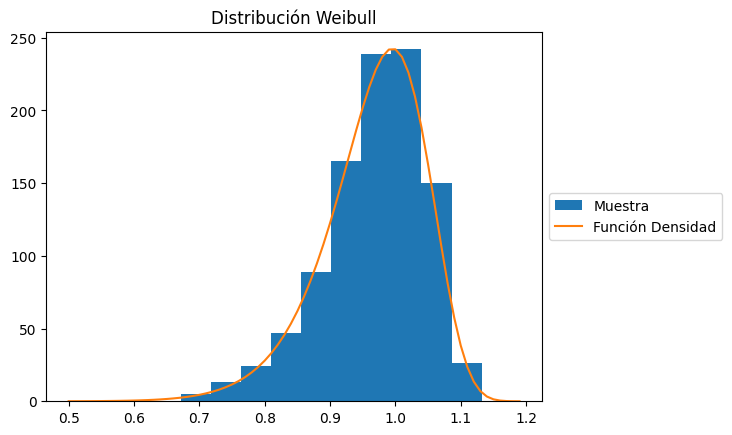

In [7]:
def weibull(x: float, shape, n) -> float:
    return (shape / n) * (x / n) ** (shape - 1) * np.exp(-(x / n) ** shape)

shape = 15
delta = 1

x = np.arange(50, 120) / 100
y = weibull(x, shape, delta)

fig = plt.figure()
ax = plt.subplot(111)

count, bins, ignored = ax.hist(np.random.weibull(shape, 1000), label='Muestra')

scale = count.max() / y.max()
ax.plot(x, y * scale, label='Función Densidad')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Distribución Weibull')
plt.show()

#### B) Cantidad de dinero disponible para pagar

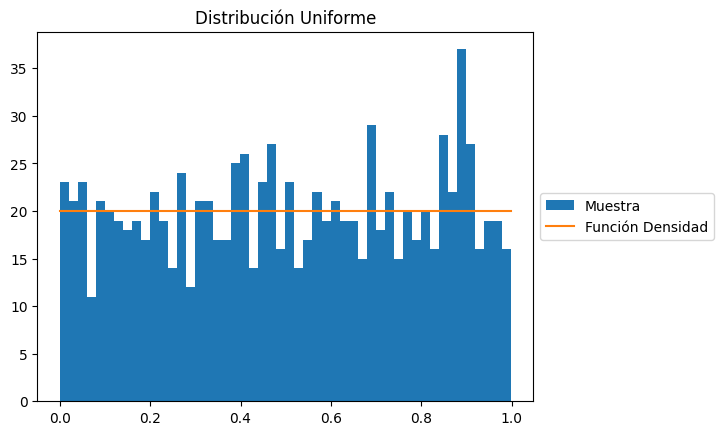

In [8]:
x = np.arange(0, 600) / 600
y = np.ones(len(x))

fig = plt.figure()
ax = plt.subplot(111)

count, bins, ignored = ax.hist(np.random.rand(1000), bins=50, label='Muestra')

scale = count.sum() / len(count)
ax.plot(x, y * scale, label='Función Densidad')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Distribución Uniforme')
plt.show()

### Paso 5: Simular

#### A) Simulación _tick-by-tick_ 

In [9]:
import SimulacionTick

simulación_tick_by_tick = SimulacionTick.Simulación(600)
simulación_tick_by_tick.start(600)

                                         INICIO SIMULACIÓN                                          


-----------------------------------------------08:30------------------------------------------------

-----------------------------------------------08:31------------------------------------------------

-----------------------------------------------08:32------------------------------------------------

-----------------------------------------------08:33------------------------------------------------

-----------------------------------------------08:34------------------------------------------------

-----------------------------------------------08:35------------------------------------------------

-----------------------------------------------08:36------------------------------------------------

-----------------------------------------------08:37------------------------------------------------

-----------------------------------------------08:38-----------------------------

In [10]:
simulación_tick_by_tick.stats['atención_clientes']

,Caso,Cantidad
0,Compraron almuerzo,388
1,No fueron a comprar almuerzo,212
2,No encontraron almuerzo,0
3,Les faltó tiempo,0


In [11]:
simulación_tick_by_tick.stats['ventas_locales']

,Puesto,Ganancias,Cant. Ventas
0,Empanadas Marcianas,384000,119
1,Completología,456300,173
2,Hand-Rororoll,326500,96


#### B) Simulación de Eventos Discretos (DES)

In [12]:
import SimulacionDES

simulación_tick_by_tick = SimulacionDES.Simulación(600)
simulación_tick_by_tick.start()

                                         INICIO SIMULACIÓN                                          



----------------------------------------------11:31:38----------------------------------------------
[    Completología    ]	 El cliente (636) se a unido a la cola. Hay 1 clientes esperando.

----------------------------------------------11:31:53----------------------------------------------
[    Completología    ]	 El cliente (636) empezó a ser atendido.
[    Completología    ]	 El cliente (636) compró un "Italiano". El local ganó $3500

----------------------------------------------11:42:58----------------------------------------------
[    Completología    ]	 El cliente (992) se a unido a la cola. Hay 1 clientes esperando.

----------------------------------------------11:43:13----------------------------------------------
[    Completología    ]	 El cliente (992) empezó a ser atendido.
[    Completología    ]	 El cliente (992) compró un "Pancho". El local ganó $2000

------------

In [13]:
simulación_tick_by_tick.stats['atención_clientes']

,Caso,Cantidad
0,Compraron almuerzo,532
1,No fueron a comprar almuerzo,0
2,No encontraron almuerzo,68
3,Les faltó tiempo,0


In [14]:
simulación_tick_by_tick.stats['ventas_locales']

,Puesto,Ganancias,Cant. Ventas
0,Empanadas Marcianas,547300,170
1,Completología,604300,221
2,Hand-Rororoll,491000,141
